In [2]:
with open('./texts/how_dare_you.txt', 'r') as file:
    speech = file.read()

In [3]:
speech = speech.replace('\n', ' ')

tokens = speech.split(' ')
len(tokens)

518

In [27]:
import string

# list of punctuation
punc = string.punctuation + '–' + '"' + '?'

# for word in speech:
#     if word.isdigit():
#         speech = speech.replace(word, ' ')

for p in punc:
    speech = speech.replace(p, ' ')
    # problem is it cut the digits. Do I need it ??


tokens = speech.split(' ')

        
filtered_tokens = list(filter(lambda x: x != '', tokens))

In [5]:
uniformed_tokens = [ x.lower() for x in filtered_tokens]
len(uniformed_tokens)

509

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = [x for x in stopwords.words('english') if x not in ['we', 'you', 'i', 'our', 'your']]

print(stop_words)

speech_without_sw=[x for x in uniformed_tokens if x not in stop_words]
# for word in uniformed_words:
#     if word not in stop_words:
#         speech_without_sw.append(word)

len(speech_without_sw)

['me', 'my', 'myself', 'ours', 'ourselves', "you're", "you've", "you'll", "you'd", 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'w

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laetitiataddei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


284

In [8]:
def speech_freq(list):
    _dict = {}
    for el in list:
        if len(el)> 2:
            if _dict.get(el):
                _dict[el] += 1
            else:
                _dict[el] = 1
    return _dict

tokens_frequencies = speech_freq(speech_without_sw)

TOP 25 WORDS

In [9]:
couples = tokens_frequencies.items()
ordered_tokens = sorted(couples, reverse=True, key=lambda item: item[1])

top25 = ordered_tokens[:25]
top25_dict = dict(top25)

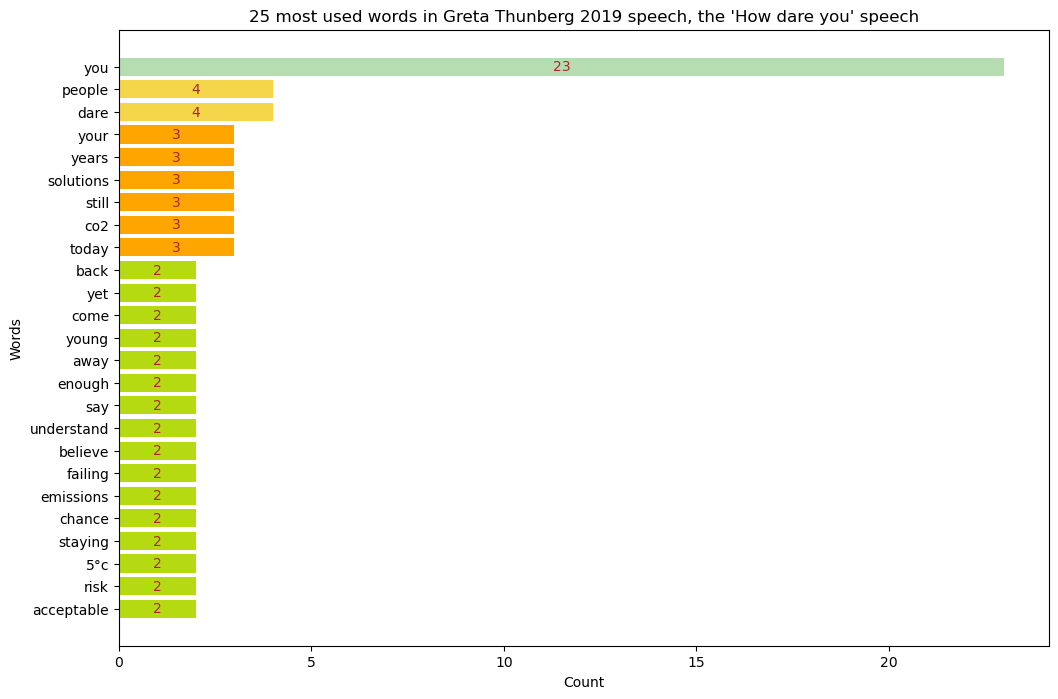

In [15]:
import matplotlib.pyplot as plt
vert_pale = '#b6dcb1'
vert_anis = '#b5da11'
green = '#a0b55a'
yellow = '#f5d64a'


colors = [vert_pale if i > 6 else yellow if i >= 4 else 'orange' if i == 3 else vert_anis for i in top25_dict.values()]
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('25 most used words in Greta Thunberg 2019 speech, the \'How dare you\' speech')
bars = ax.barh(list(top25_dict.keys()), list(top25_dict.values()), color=colors)
ax.invert_yaxis()
ax.set_ylabel('Words')
ax.set_xlabel('Count')
ax.bar_label(bars, label_type='center', color='brown')

plt.show()

TOP 10 WORDS

In [24]:
top10 = ordered_tokens[:10]
top10_dict = dict(top10)
top10_dict

{'you': 23,
 'people': 4,
 'dare': 4,
 'your': 3,
 'years': 3,
 'solutions': 3,
 'still': 3,
 'co2': 3,
 'today': 3,
 'back': 2}

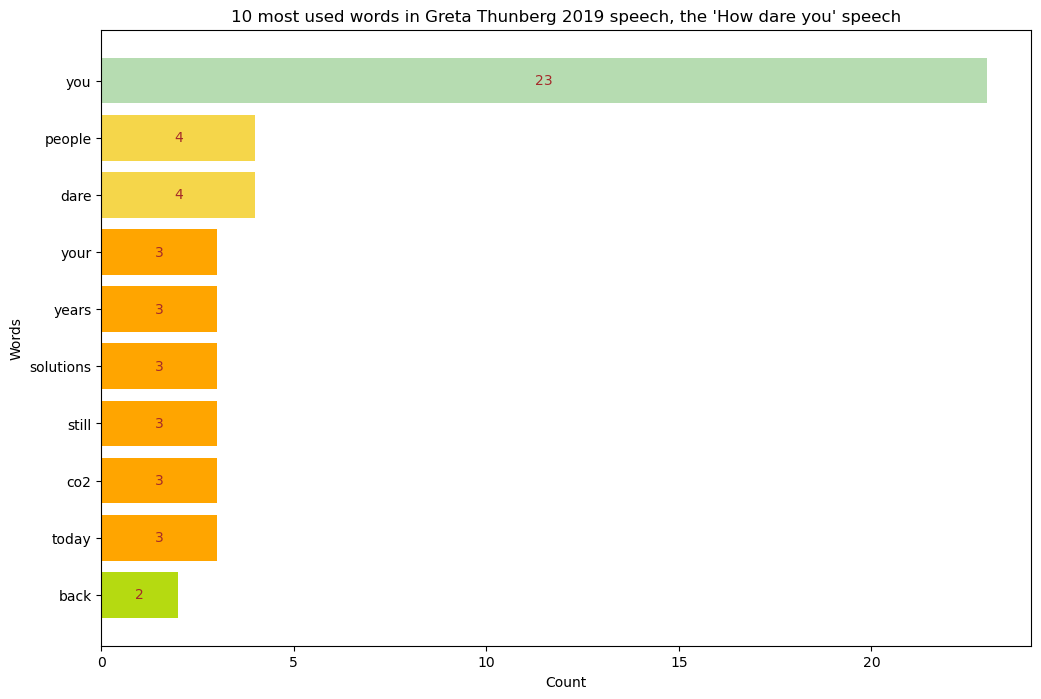

In [26]:
colors = [vert_pale if i > 6 else yellow if i >= 4 else 'orange' if i == 3 else vert_anis for i in top25_dict.values()]
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('10 most used words in Greta Thunberg 2019 speech, the \'How dare you\' speech')
bars = ax.barh(list(top10_dict.keys()), list(top10_dict.values()), color=colors)
ax.invert_yaxis()
ax.set_ylabel('Words')
ax.set_xlabel('Count')
ax.bar_label(bars, label_type='center', color='brown')

plt.show()

WORDCLOUD ON THE TOP 25 WORDS

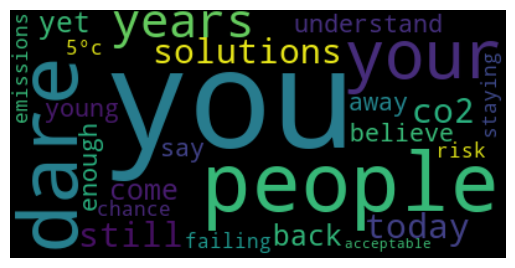

<Figure size 640x480 with 0 Axes>

In [16]:
import os
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

# make a text out of our result
cloud_text = (' ').join([x for x in top25_dict])

# generate_from_frequencies pour dictionnaire
wordcloud = WordCloud().generate_from_frequencies(top25_dict)
# store to file
# wordcloud.to_file("./dare.png")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.figure()

plt.show()

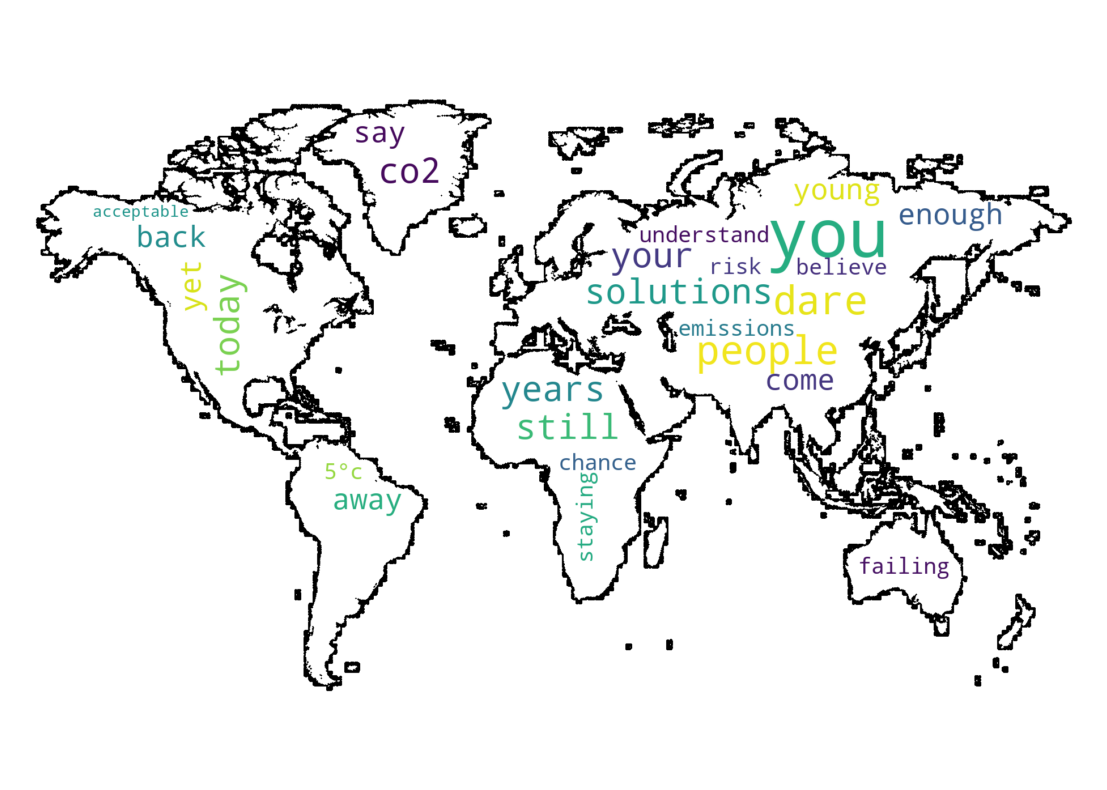

In [23]:
map_mask2 = np.array(Image.open('./masks/world_mask.jpg'))

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=map_mask2,
    contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate_from_frequencies(top25_dict)

# store to file
# wc.to_file("dare_map.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()